In [26]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [27]:
data = pd.read_csv('../../data/paragraph_clean_data.csv',dtype={'article_text':'string'})

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  79 non-null     int64 
 1   paragraph   79 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [29]:
encoder_model = SentenceTransformer('all-MiniLM-L6-v2')
# Utility function for generating sentence embedding from the text
def get_embeddinngs(text):
    return encoder_model.encode(text)

In [30]:
# Generating sentence embedding from the text
data['embeddings'] = data['paragraph'].apply(get_embeddinngs)

In [31]:
X = np.array(data['embeddings'].tolist())

In [45]:
SEED = 43

In [32]:
sklearn_kmeans_model = KMeans(n_clusters=4,random_state=SEED).fit(X)

In [33]:
# Get the labels using KMeans
pred_labels = sklearn_kmeans_model.labels_
pred_labels

array([3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 1, 1, 1, 3, 1, 0, 3, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 3, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 3])

In [46]:
from scipy.spatial.distance import cdist
Sum_of_squared_distances = []
mapping = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k,random_state=SEED).fit(X)
    kmeanModel.fit(X)
  
    Sum_of_squared_distances.append(kmeanModel.inertia_)

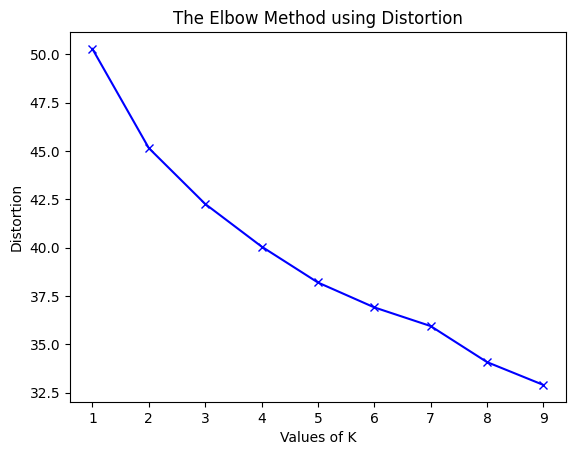

In [47]:

import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
def get_silhouette_score(X, k):
    for n_clusters in range(2, k):
        clusterer = KMeans(init="k-means++", n_clusters=n_clusters, random_state=42)
        y = clusterer.fit_predict(X)

        message = "For n_clusters = {} The average silhouette_score is: {}"
        print(message.format(n_clusters, silhouette_score(X, y)))

get_silhouette_score(X, 10)

For n_clusters = 2 The average silhouette_score is: 0.11688055098056793
For n_clusters = 3 The average silhouette_score is: 0.09673412889242172
For n_clusters = 4 The average silhouette_score is: 0.08078785240650177
For n_clusters = 5 The average silhouette_score is: 0.07320098578929901
For n_clusters = 6 The average silhouette_score is: 0.09083057940006256
For n_clusters = 7 The average silhouette_score is: 0.09592583030462265
For n_clusters = 8 The average silhouette_score is: 0.0968191847205162
For n_clusters = 9 The average silhouette_score is: 0.09635967761278152


In [ ]:
#neither method gave us ideal visibility into the number of clusters

In [36]:
#Select k=7
sklearn_kmeans_model = KMeans(n_clusters=2,random_state=SEED).fit(X)

In [38]:
sklearn_kmeans_model.labels_

array([4, 4, 1, 0, 0, 3, 0, 0, 0, 0, 4, 3, 5, 4, 3, 4, 4, 4, 4, 4, 3, 3,
       3, 4, 4, 5, 6, 5, 5, 5, 4, 3, 1, 4, 6, 6, 4, 2, 0, 6, 1, 2, 2, 3,
       2, 1, 6, 2, 2, 6, 3, 2, 1, 3, 4, 6, 2, 3, 3, 1, 4, 6, 5, 6, 0, 0,
       3, 4, 4, 5, 6, 4, 4, 4, 3, 3, 5, 4, 3])

In [39]:
import pickle
pickle.dump(sklearn_kmeans_model, open("../models/sklearn_kmeans_model.pkl", "wb"))

In [42]:
# Inference Code
saved_model = pickle.load(open('../models/sklearn_kmeans_model.pkl', 'rb'))
test_text = "Tesla is in Austin,Texas.Tesla CEO is Elon Musk.The logo of car manufacturer Tesla is seen recently"
vector = get_embeddinngs(test_text)
print(saved_model.predict(vector.reshape(1, -1))[0])


0
